<a href="https://colab.research.google.com/github/marcilioduarte/portfolio_marcilioduarte/blob/main/ESTUDO_DE_CASO_DESAFIO_IFOOD_(WORKING_CASE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***ESTUDO DE CASO DE DATA ANALYTICS - IFOOD_GITHUB - MARCILIO DUARTE***

##**O CASE**

**The Company**

Consider a well-established company operating in the retail food sector. Presently they have around several hundred thousands of registered customers and serve almost one million consumers a year. They sell products from 5 major categories: wines, rare meat products, exotic fruits, specially prepared fish and sweet products. These can further be divided into gold and regular products. The customers can order and acquire products through 3 sales channels: physical stores, catalogs and the company’s website. Globally, the company had solid revenues and a healthy bottom line in the past 3 years, but the profit growth perspectives for the next 3 years are not promising... For this reason, several strategic initiatives are being considered to invert this situation. One is to improve the performance of marketing activities, with a special focus on marketing campaigns.

**The Marketing Department**

The marketing department was pressured to spend its annual budget more wisely. The CMO perceives the importance of having a more quantitative approach when taking decisions, reason why a small team of data scientists was hired with a clear objective in mind: to build a solution which will support direct marketing initiatives. Desirably, the success of these activities will prove the value of the approach and convince the more skeptical within the company

**The Objective**

The objective of the team is to build an analysis to address the highest profit for the next direct marketing campaign, scheduled for the next month. The new campaign, sixth, aims at selling a new gadget to the Customer Database. To build the analysis, a pilot campaign involving 2.240 customers was carried out. The customers were selected at random and contacted by phone regarding the acquisition of the gadget. During the following months, customers who bought the
offer were properly labeled. The total cost of the sample campaign was 6.720MU and the revenue generated by the customers who accepted the offer was 3.674MU. Globally the campaign had a profit of -3.046MU. The success rate of the campaign was 15%.



##**SOLUÇÃO:**

###***Importanto os dados e algumas bibliotecas***

In [ ]:
## Importando as bibliotecas que eu vou usar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Importando a base e criando um dataframe df

df=pd.read_csv('https://raw.githubusercontent.com/ifood/ifood-data-analyst-case/main/retail_case_data.csv')

In [ ]:
## Vendo se deu tudo certo

df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
## Ok, a visualização deu certo, temos 2240 linhas e 29 colunas. 
## Agora vamos começar a análise exploratória e descritiva dos dados.

###***Análise exploratória***

In [ ]:
## Vendo as colunas do data frame para identificar com quais dados estamos trabalhando
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
## Ok, é exatamente o que está descrito no PDF do desafio. 

In [ ]:
## Para entender melhor nossos dados, o comando abaixo nos mostra a quantidade de valores não nulos de cada coluna e qual o tipo de informação que está armazenada (texto, int e etc)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
## Confirmando a quantidade de informações nulas de cada coluna, talvez vamos precisar disso depois.
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
## 24 nulos na coluna da renda, depois vamos aplicar um filtro para esses dados

In [ ]:
## Resumo estatístico das variáveis que não são dummies, texto ou data

df[['Year_Birth','Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']].describe().round(2)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
count,2240.00,2216.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.0,2240.0
mean,1968.81,52247.25,0.44,0.51,49.11,303.94,26.30,166.95,37.53,27.06,44.02,2.33,4.08,2.66,5.79,5.32,3.0,11.0
std,11.98,25173.08,0.54,0.54,28.96,336.60,39.77,225.72,54.63,41.28,52.17,1.93,2.78,2.92,3.25,2.43,0.0,0.0
min,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0
25%,1959.00,35303.00,0.00,0.00,24.00,23.75,1.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,3.0,11.0
50%,1970.00,51381.50,0.00,0.00,49.00,173.50,8.00,67.00,12.00,8.00,24.00,2.00,4.00,2.00,5.00,6.00,3.0,11.0
75%,1977.00,68522.00,1.00,1.00,74.00,504.25,33.00,232.00,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00,3.0,11.0
max,1996.00,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,263.00,362.00,15.00,27.00,28.00,13.00,20.00,3.0,11.0


In [ ]:
## Observações extraídas até então:
### Coluna de ano de  nascimento: algum cliente inseriu data de nascimento em 1893, mas isso não faz sentido, iremos verificar depois.
### Coluna de renda: o valor mínimo dessa coluna (1730) e o valor máximo (666666) também estão destoando bastante da média e da mediana da renda. Verificar quem são esses cliente depois.
### Número de compras com descontos: o máximo é bem maior do que a média e a mediana, 15 compras. Talvez essa informação esteja errada.
## As colunas de custo do contrato e de receita são valores constantes, então possivelmente podemos "dropá-las"

In [ ]:
## Agora, vamos ver quais são as categorias existentes dentro das variáveis categóricas:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
## As categorias "YOLO" e "Absurd" não condizem com a informação que queremos. Provavelmente foi alguma "zoeira" de um usuário, portanto podemos deletá-las. 
## A categoria Alone também não faz muito sentido, talvez podemos incluir suas observações na single, divorced ou widow.

In [ ]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
## Considerando que esses níveis de graduação são estadunidenses, temos que:
## 1) "2n Cycle" é o mesmo que o nível de "Master". Logo, vamos realizar essa substituição.
## 2) O nível chamado de "graduation", nos EUA, não é o mesmo que o nível de graduação no Brasil. Ele faz referência a estudantes com pós-graduação, mestrado ou doutorado.
## Como neste caso não sabemos se os estudantes de graduation são apenas os estudantes de pós ou se neles também estão incluídos os demais tipos (mestrado e doutorado), vou mantê-los de forma separada.

## referência: https://www.estudarfora.org.br/graduate-e-undergraduate-diferenca/#:~:text=Nos%20Estados%20Unidos%2C%20os%20undergraduate,um%20curso%20de%20n%C3%ADvel%20undergraduate.

In [ ]:
## Agora, vamos analisar variável de "Data de cliente" para entender mais sobre a base e sobre o intervalo temporal.
df['Dt_Customer'].min()

'2012-07-30'

In [ ]:
df['Dt_Customer'].max()

'2014-06-29'

In [ ]:
## As datas indicam que a base começou em 2012 e termina em 2014. Isso é importante para nossa análise tbm.

In [ ]:
## Comentário final da AE:

### Dropar colunas com var. constantes.
### Tratar dados da coluna de ano de nascimento (min).
### Tratar dados da coluna de estado civil (yolo, absurd, alone).
## Tratar dado da coluna de educação (2n cycle=Master)
### Tratar dados da renda: valor máximo, analisar valores mínimos e possivelmente substituir nulos.
### Avaliar coluna de compras com descontos: o máximo é bem maior do que a média e a mediana, 15 compras.


### **Tratando os dados de acordo com o que foi identificado na AE**

#### **Tratamentos iniciais (drops e substituições, exceto da income)**

In [ ]:
## primeiro, vamos apagar as colunas de variáveis constantes que não iremos utilizar (custo=3 e receita=11)

In [ ]:
df.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


In [ ]:
## funcionou

In [ ]:
## visualizando dado com a renda errada
df[df['Income']==666666]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,1,3,6,0,0,0,0,0,0,0


In [ ]:
## fazendo o replace e substituindo por um dado nulo
df['Income'].replace(666666, np.nan, inplace=True)

In [ ]:
## verificando o novo máximo
df['Income'].max()

162397.0

In [ ]:
## deu tudo certo

In [ ]:
## olhando agora para o mínimo da renda
df.sort_values("Income").head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
1245,6862,1971,Graduation,Divorced,1730.0,0,0,2014-05-18,65,1,...,0,0,20,0,0,0,0,0,0,0
21,5376,1979,Graduation,Married,2447.0,1,0,2013-01-06,42,1,...,28,0,1,0,0,0,0,0,0,0
1524,11110,1973,Graduation,Single,3502.0,1,0,2013-04-13,56,2,...,0,0,14,0,0,0,0,0,0,0
1846,9931,1963,PhD,Married,4023.0,1,1,2014-06-23,29,5,...,0,0,19,0,0,0,0,0,0,0
1975,10311,1969,Graduation,Married,4428.0,0,1,2013-10-05,0,16,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
## a renda mínima não irei alterar pois não parece estar errada, dados os valores das demais que vêm em sequência. Mas pode ser que alguns usuários tenham colocado sua renda mensal e outros anual.
## então vou manter como está por enquanto.
## a parte dos nulos eu vou tratar depois, por enquanto, vamos seguir com os demais tratamentos.

In [ ]:
## agora vamos analisar o ano de nascimento
df.sort_values('Year_Birth').head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,2,4,0,0,0,0,0,0,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,6,4,1,0,0,1,0,0,0,0
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,1,2,5,0,0,0,0,0,1,0
1950,6663,1940,PhD,Single,51141.0,0,0,2013-07-08,96,144,...,1,4,5,0,0,0,0,0,0,0
424,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,...,10,5,2,0,0,1,0,0,0,0


In [ ]:
## e os anos máximos de nascimento (pessoas mais novas da base)
df.sort_values('Year_Birth').tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
747,10548,1995,Graduation,Single,71163.0,0,0,2014-03-09,30,283,...,8,12,1,0,0,0,0,0,0,0
1850,4427,1995,2n Cycle,Single,83257.0,0,0,2012-09-18,56,536,...,10,12,6,1,0,1,0,0,1,1
696,8315,1995,Graduation,Single,34824.0,0,0,2014-03-26,65,4,...,0,2,6,0,0,0,0,0,0,0
1170,193,1996,Basic,Married,14421.0,0,0,2014-02-17,81,0,...,0,2,5,1,0,0,0,0,0,0
46,9909,1996,2n Cycle,Married,7500.0,0,0,2012-11-09,24,3,...,1,3,9,0,0,0,0,0,0,1


In [ ]:
## vamos substituir os anos de 1900, 1899 e 1893 por dados nulos e depois vamos substituí-los pela média de ano de nascimento porque não faz sentido termos pessoas com mais de 110 anos de idade na base.
df['Year_Birth'].replace([1893,1899,1900], np.nan, inplace=True)

In [ ]:
## se tiver funcionado, o novo ano mínimo tem que ser 1940
df['Year_Birth'].min()

1940.0

In [ ]:
## substituindo pela média
df['Year_Birth'].replace(np.nan, df['Year_Birth'].mean().astype(int), inplace=True)

In [ ]:
## vendo se deu certo
df[df['ID']==11004]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
239,11004,1968.0,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,2,4,0,0,0,0,0,0,0


In [ ]:
## ok, deu certo. Agora vamos analisar os dados do estado de casamento=YOLO para ver se é realmente um erro e se podemos substituí-lo.
df[df["Marital_Status"]=="YOLO"]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2177,492,1973.0,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,1,6,8,0,0,0,0,0,0,0
2202,11133,1973.0,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,1,6,8,0,0,0,0,0,0,1


In [ ]:
## há apenas duas observações com "Marital_Status=YOLO" e elas estão duplicadas.
## a única diferença entre elas é que uma tem "Response=0" e outra "Response=1". 
## em outras palavras, uma diz que o cliente aceitou a última oferta de campanha e a outra diz que ele não aceitou, e isso nos leva a outro problema:
## identificar qual observação é a correta.
## para descobrir qual das duas está correta, primeiro vou verificar todas as dummies sobre as campanhas 
## quero descobrir se todos os clientes aceitaram pelo menos uma das ofertas. 
## se for o caso, irei manter a observação que aceitou a campanha. Se não, não posso apagar nenhuma das duas e irei seguir outro caminho de análise.

In [ ]:
df[['ID', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']]

,ID,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
0,5524,0,0,0,0,0,1
1,2174,0,0,0,0,0,0
2,4141,0,0,0,0,0,0
3,6182,0,0,0,0,0,0
4,5324,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2235,10870,0,0,0,0,0,0
2236,4001,0,0,0,1,0,0
2237,7270,0,1,0,0,0,0
2238,8235,0,0,0,0,0,0


In [ ]:
## Analisando as observações, muitas não aceitaram nenhuma campanha (ID=2174, 4141, 6182 5324...), logo, seguirei a análise de outra forma.

In [ ]:
## Minha segunda opção é analisar a variável recency. Quero identificar quando foi a última compra dos clientes que tiveram response=1.
df[(df['Response']==1)].sort_values("Recency",ascending=True)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
551,5371,1989.0,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,1,2,7,1,0,0,0,0,0,1
822,1,1961.0,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,3,7,5,0,0,0,0,1,0,1
1834,10521,1977.0,Graduation,Married,54809.0,1,1,2013-09-11,0,63,...,1,5,4,0,0,0,0,0,0,1
749,4073,1954.0,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,...,10,7,6,1,0,0,0,0,0,1
1089,7348,1958.0,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,7,5,2,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,4127,1967.0,PhD,Married,77766.0,0,1,2013-02-22,97,1004,...,10,11,6,1,0,0,0,0,0,1
1252,5153,1967.0,PhD,Married,77766.0,0,1,2013-02-22,97,1004,...,10,11,6,1,0,0,0,0,0,1
1261,3979,1983.0,PhD,Divorced,90687.0,0,0,2013-05-22,98,982,...,2,8,2,0,0,1,0,0,0,1
690,7230,1960.0,PhD,Divorced,50611.0,0,1,2012-10-04,98,459,...,5,7,6,0,1,0,0,0,0,1


In [ ]:
## com isso, identificamos que os 334 clientes que aceitaram a oferta da última campanha fizeram sua última nos últimos 99 dias.
## agora, vamos ver se os clientes que não aceitaram a oferta da última campanha compraram nesse prazo também.
df[(df['Response']==0)].sort_values("Recency",ascending=True)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
536,1991,1967.0,Graduation,Together,44931.0,0,1,2014-01-18,0,78,...,1,3,5,0,0,0,0,0,0,0
1975,10311,1969.0,Graduation,Married,4428.0,0,1,2013-10-05,0,16,...,0,0,1,0,0,0,0,0,0,0
758,10470,1979.0,Master,Married,40662.0,1,0,2013-03-15,0,40,...,1,3,4,0,0,0,0,0,0,0
2049,2079,1947.0,2n Cycle,Married,81044.0,0,0,2013-12-27,0,450,...,6,10,1,0,0,0,0,0,0,0
23,4047,1954.0,PhD,Married,65324.0,0,1,2014-01-11,0,384,...,2,9,4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685,7947,1969.0,Graduation,Married,42231.0,1,1,2014-03-25,99,24,...,0,3,5,0,0,0,0,0,0,0
1894,1743,1974.0,Graduation,Single,69719.0,0,0,2014-05-26,99,273,...,3,5,1,0,0,0,0,0,0,0
700,9977,1973.0,Graduation,Divorced,78901.0,0,1,2013-09-17,99,321,...,3,5,4,0,0,0,0,0,0,0
208,868,1966.0,Graduation,Married,44794.0,0,1,2014-06-08,99,54,...,0,3,6,0,0,0,0,0,0,0


In [ ]:
## também não conseguimos identificar qual dos dois cadastros é o correto porque dentre os 1906 clientes que não aceitaram a oferta, todos também compraram nos últimos 99 dias.

In [ ]:
## partindo para outra análise, vamos pensar nos dados do anunciado.
## de acordo com a questão do ifood, a receita total da última campanha foi de 3674 U.
## se considerarmos que 334 clientes (o yolo incluso) que aceitaram a última oferta gastaram um valor X em média, o que podemos inferir?

gmed_por_cliente_yincluso=3674/334
gmed_por_cliente_yincluso


11.0

In [ ]:
## ok, 11 "redondo", um resultado interessante.
## e se considerarmos que na verdade o Yolo não comprou o produto da última oferta, e os 3674 U da campanha foram divididos entre 333 clientes? 
## qual será o valor médio do gasto por cliente
## e lembrando que a variável que apagamos da receita por cliente era uma constante com valor igual a 11
## o que podemos inferir?
gmed_por_cliente_ynaoinc=3674/333
gmed_por_cliente_ynaoinc

11.033033033033034

In [ ]:
## hmmm, achamos uma pista interessante. 
## lembra que apagamos uma variável chamada  "Z_revenue" que era uma constante=11 e que a definição dela no dicionário é "revenue from the new gadget"
## se considerarmos que essa variável indica a receita média por cliente na nova campanha, podemos dizer que o YOLO sendo um cliente que aceitou a campanha faz mais sentido
## do que o YOLO sendo um cliente que não aceitou a oferta, já que 11,03 é mais distante de 11 do que o próprio 11 redondo.

In [ ]:
## vamos agora, pensar pela ótica da taxa de sucesso da campanha.
## de acordo com nossas informações, a taxa foi de 15%.
## portanto, considerando que 334 clientes (yolo response=1) compraram o produto e que na verdade são 2239 clientes na base, temos:
tx_suc_yr1=334/2239
tx_suc_yr1

0.14917373827601607

In [ ]:
## por outro lado, considerando 333 clientes (yolo response=0) e 2239 clientes, temos:
tx_suc_yr0=333/2239
tx_suc_yr0

0.14872711031710584

In [ ]:
## como o primeiro resultado está mais próximo de 15% do que o segundo, podemos dizer que a hipótese de que o YOLO correto é o que comprou o produto está ainda mais forte.
## porém, ainda não é precisamente 15%, então melhor não tomar uma decisão ainda
## vamos fazer outra análise

In [ ]:
## minha próxima ideia é analisar todos os clientes que compraram nos útlimos 3 dias, nasceram em 1973 e tem PhD. Quem sabe a informação não está triplicada.
df[(df['Recency']==3) & (df['Education']=='PhD')& (df['Year_Birth']==1973)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
1595,1041,1973.0,PhD,Single,48432.0,0,1,2012-10-18,3,322,...,1,6,8,0,0,0,0,0,0,1
2177,492,1973.0,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,1,6,8,0,0,0,0,0,0,0
2202,11133,1973.0,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,1,6,8,0,0,0,0,0,0,1


In [ ]:
## BINGO!!!! a informação está triplicada. Os três clientes são a mesma pessoa, a diferença está que o novo ID (1041) tem o Marital_status=Single
## MASSSSSS...pesquisando no google, pude compilar o seguinte:
## 'YOLO:“you only live once” — a term that is widely seen to have been popularized by Canadian rapper Drake in 2011." 
## "used to express the view that one should make the most of the present moment without worrying about the future."
## ou seja, yolo é uma expressão popular americana que significa que só se vive uma vez.
## além disso, o termo é frequentemente utilizado na frase SOLO YOLO, que indica a filosofia de vida individualista.


## logoooo... podemos sim inferir que o ID 1041 em que a pessoa tem o estado civil de solteira e aceitou a última campanha faz sentido! 
## portanto, o melhor a se fazer é deletar ambas as observações com o marital status YOLO.

In [ ]:
## após essa longa batalha, vamos então deletar as observações erradas:
df.drop(index=[2177,2202],inplace=True)

In [ ]:
## verificando se deu certo
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd'], dtype=object)

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957.0,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954.0,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965.0,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984.0,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981.0,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967.0,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946.0,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981.0,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956.0,Master,Together,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


In [ ]:
## deu certo, menos duas observações e o estado civil "yolo" não está mais na categoria estado civil.
## agora, ainda sobre a variável de estado civil, vamos analisar o absurd
df[df['Marital_Status']=="Absurd"]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2093,7734,1993.0,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,...,10,7,1,0,0,1,1,0,0,1
2134,4369,1957.0,Master,Absurd,65487.0,0,0,2014-01-10,48,240,...,5,6,2,0,0,0,0,0,0,0


In [ ]:
## essa análise vai ser mais complicada que a última, porque ambos aparentemente são diferentes. Logo, temos que descobrir o que fazer com eles.
## primeiro, vamos ver se eles não estão duplicados a partir da data de customer
df[(df['Dt_Customer']=='2012-12-19')]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
75,5846,1977.0,Graduation,Divorced,40246.0,1,0,2012-12-19,68,2,...,0,2,6,0,0,0,0,0,0,0
108,3629,1978.0,Graduation,Single,38557.0,1,0,2012-12-19,17,76,...,1,3,7,0,0,0,0,0,0,0
720,5114,1965.0,Master,Married,74806.0,0,1,2012-12-19,1,670,...,4,5,4,0,0,0,0,0,0,0
2093,7734,1993.0,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,...,10,7,1,0,0,1,1,0,0,1


In [ ]:
## o ID 7734 não é duplicado

In [ ]:
## agora, vamos analisar o outro
df[(df['Dt_Customer']=='2014-01-10')]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
1663,2639,1966.0,Graduation,Single,43602.0,1,1,2014-01-10,45,19,...,1,2,6,0,0,0,0,0,0,0
1804,8397,1951.0,Graduation,Married,44689.0,1,1,2014-01-10,82,18,...,1,2,7,1,0,0,0,0,0,0
2134,4369,1957.0,Master,Absurd,65487.0,0,0,2014-01-10,48,240,...,5,6,2,0,0,0,0,0,0,0
2188,10652,1957.0,Master,Together,65487.0,0,0,2014-01-10,48,240,...,5,6,2,0,0,0,0,0,0,0


In [ ]:
## o ID 4639 é duplicado, vou apagá-lo.
df.drop(index=2134, inplace=True)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957.0,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954.0,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965.0,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984.0,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981.0,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967.0,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946.0,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981.0,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956.0,Master,Together,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


In [ ]:
## ok, deu certo

In [ ]:
## quanto ao id 7734, vou substituir o estado civil por outro a partir de uma análise das características médias das observações que se assemelham a ele em termos de idade e graduação.
## primeiro, vamos puxar as infos do id 7734 novamente
df[df['ID']==7734]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2093,7734,1993.0,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,...,10,7,1,0,0,1,1,0,0,1


In [ ]:
df[['Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response']][(df['Education']=='Graduation')&(df['Year_Birth']>=1993)].describe().round(2)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,11.00,11.0,11.0,11.00,11.00,11.00,11.00,11.00,11.00,11.00,...,11.00,11.00,11.00,11.0,11.00,11.00,11.00,11.00,11.0,11.00
mean,69805.27,0.0,0.0,47.64,384.00,50.27,353.64,116.18,45.82,80.45,...,5.09,6.64,2.82,0.0,0.09,0.27,0.18,0.09,0.0,0.27
std,18634.25,0.0,0.0,22.55,286.52,57.73,258.37,89.83,38.40,77.98,...,3.48,3.32,1.94,0.0,0.30,0.47,0.40,0.30,0.0,0.47
min,34824.00,0.0,0.0,11.00,4.00,0.00,11.00,2.00,0.00,4.00,...,0.00,2.00,1.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00
25%,70839.00,0.0,0.0,29.50,262.00,9.50,203.50,43.00,19.00,25.00,...,3.50,5.00,1.50,0.0,0.00,0.00,0.00,0.00,0.0,0.00
50%,74293.00,0.0,0.0,58.00,375.00,26.00,335.00,93.00,27.00,54.00,...,4.00,6.00,2.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00
75%,79689.00,0.0,0.0,65.50,445.50,73.50,462.50,197.00,77.50,110.50,...,7.50,8.50,4.00,0.0,0.00,0.50,0.00,0.00,0.0,0.50
max,95529.00,0.0,0.0,67.00,966.00,152.00,890.00,250.00,106.00,245.00,...,10.00,12.00,6.00,0.0,1.00,1.00,1.00,1.00,0.0,1.00


In [ ]:
## avaliando a média, o desvio padrão e a mediana, parece que o ID 7734 tem hábitos bem próximos ao desse grupo.
## portanto, vamos descobrir qual é a principal categoria de estado civil desse grupo
df['Marital_Status'][(df['Education']=='Graduation')&(df['Year_Birth']>=1993)].value_counts()

Single      8
Together    2
Absurd      1
Name: Marital_Status, dtype: int64

In [ ]:
df['Marital_Status'][(df['Education']=='Graduation')&(df['Year_Birth']>=1993)].value_counts(normalize=True)*100

Single      72.727273
Together    18.181818
Absurd       9.090909
Name: Marital_Status, dtype: float64

In [ ]:
## ignorando o absurd, o certo seria 80% single e 20% together.
## avaliando apenas isso, acredito que mudar o absurd para single é a melhor opção, mas antes...

In [ ]:
## vamos fazer uma rápida análise sobre os dois indivíduos com status "together" antes de mudar o status do 
df[(df['Marital_Status']=='Together')&(df['Year_Birth']>=1993)&(df['Education']=='Graduation')]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
417,5067,1994.0,Graduation,Together,80134.0,0,0,2014-02-14,11,966,...,7,11,5,0,1,1,1,1,0,0
1163,6905,1994.0,Graduation,Together,80685.0,0,0,2012-08-22,55,241,...,4,10,2,0,0,0,0,0,0,0


In [ ]:
## é, os indivíduos tem hábitos de consumo bem diferentes um do outro.
## logo, melhor manter o absurd como single mesmo.

In [ ]:
## substituindo
df.loc[df['Marital_Status']=='Absurd','Marital_Status']='Single'

In [ ]:
## verificando se deu certo
df[df['ID']==7734]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2093,7734,1993.0,Graduation,Single,79244.0,0,0,2012-12-19,58,471,...,10,7,1,0,0,1,1,0,0,1


In [ ]:
## agora, ainda sobre o marital status, só falta avaliar os alones. Minha ideia é substituir por solteiros, viúvos ou divorciados, mas antes vamos fazer uma breve análise
df[df['Marital_Status']=='Alone']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
131,433,1958.0,Master,Alone,61331.0,1,1,2013-03-10,42,534,...,1,6,8,0,0,0,0,0,0,0
138,7660,1973.0,PhD,Alone,35860.0,1,1,2014-05-19,37,15,...,1,2,5,1,0,0,0,0,0,1
153,92,1988.0,Graduation,Alone,34176.0,1,0,2014-05-12,12,5,...,0,4,6,0,0,0,0,0,0,0


In [ ]:
## como feito antes, vamos ver se as infos não estão duplicadas.
df[(df['Dt_Customer']=='2013-03-10')&(df['Year_Birth']==1958)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
131,433,1958.0,Master,Alone,61331.0,1,1,2013-03-10,42,534,...,1,6,8,0,0,0,0,0,0,0


In [ ]:
## ok, o ID 433 é único. Agora vamos pro próximo, ID 7660

In [ ]:
df[(df['Dt_Customer']=='2014-05-19')&(df['Year_Birth']==1973)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
138,7660,1973.0,PhD,Alone,35860.0,1,1,2014-05-19,37,15,...,1,2,5,1,0,0,0,0,0,1
1063,2055,1973.0,PhD,Divorced,35860.0,1,1,2014-05-19,37,15,...,1,2,5,1,0,0,0,0,0,0
1260,5107,1973.0,PhD,Divorced,35860.0,1,1,2014-05-19,37,15,...,1,2,5,1,0,0,0,0,0,0
1585,1626,1973.0,PhD,Divorced,35860.0,1,1,2014-05-19,37,15,...,1,2,5,1,0,0,0,0,0,1


In [ ]:
## este id está quadruplicado, mas em 3 dos casos ele é divorciado, porém em duas das observações temos que ele comprou o produto da última campanha e em outras duas não.
## ou seja, mais dor de cabeça, qual é o correto? 

In [ ]:
# vamos analisar os clientes que são divorciados, com uma criança e um adolescente em casa e que tem PhD para tentar identificar padrões de consumo em relação à última oferta.
df[(df['Education']=='PhD')&(df['Marital_Status']=='Divorced')&(df['Kidhome']>=1)&(df['Teenhome']>=1)&(df['Response']==0)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
139,1461,1965.0,PhD,Divorced,36921.0,1,1,2013-07-28,74,17,...,0,3,7,0,0,0,0,0,0,0
322,8275,1965.0,PhD,Divorced,47025.0,1,1,2014-02-09,6,16,...,0,2,7,0,0,0,0,0,0,0
389,9799,1968.0,PhD,Divorced,83664.0,1,1,2013-05-08,57,866,...,2,12,5,0,0,0,0,0,0,0
407,8890,1971.0,PhD,Divorced,65808.0,1,1,2014-05-30,1,155,...,1,5,6,0,0,0,0,0,0,0
628,3469,1977.0,PhD,Divorced,34487.0,1,1,2012-09-06,94,19,...,0,3,9,0,0,0,0,0,0,0
730,5329,1949.0,PhD,Divorced,35946.0,1,1,2013-09-27,24,8,...,0,3,5,0,0,0,0,0,0,0
733,5956,1948.0,PhD,Divorced,45072.0,1,2,2013-10-16,74,144,...,1,4,8,0,0,0,0,0,0,0
830,4887,1976.0,PhD,Divorced,55412.0,1,1,2013-11-22,65,10,...,0,3,5,0,0,0,0,0,0,0
1063,2055,1973.0,PhD,Divorced,35860.0,1,1,2014-05-19,37,15,...,1,2,5,1,0,0,0,0,0,0
1260,5107,1973.0,PhD,Divorced,35860.0,1,1,2014-05-19,37,15,...,1,2,5,1,0,0,0,0,0,0


In [ ]:
df[(df['Education']=='PhD')&(df['Marital_Status']=='Divorced')&(df['Kidhome']>=1)&(df['Teenhome']>=1)&(df['Response']==1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
1409,10010,1953.0,PhD,Divorced,36957.0,1,1,2012-09-06,43,100,...,2,2,9,0,0,0,0,0,0,1
1585,1626,1973.0,PhD,Divorced,35860.0,1,1,2014-05-19,37,15,...,1,2,5,1,0,0,0,0,0,1


In [ ]:
df[(df['Education']=='PhD')&(df['Marital_Status']=='Divorced')&(df['Kidhome']>=1)&(df['Teenhome']>=1)].describe().round(2)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,14.00,14.00,14.00,14.0,14.00,14.00,14.00,14.00,14.00,14.00,...,14.00,14.00,14.00,14.00,14.0,14.0,14.0,14.0,14.0,14.00
mean,6051.00,1964.14,45227.29,1.0,1.07,40.36,115.57,4.00,35.07,7.36,...,0.71,3.57,6.50,0.21,0.0,0.0,0.0,0.0,0.0,0.14
std,3155.00,10.63,14223.40,0.0,0.27,29.32,226.00,6.93,44.61,8.82,...,0.73,2.59,1.56,0.43,0.0,0.0,0.0,0.0,0.0,0.36
min,1461.00,1948.00,34487.00,1.0,1.00,1.00,8.00,0.00,2.00,0.00,...,0.00,2.00,5.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00
25%,3823.50,1954.00,35881.50,1.0,1.00,14.25,15.00,0.00,8.00,2.25,...,0.00,2.00,5.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00
50%,5642.50,1966.50,39197.00,1.0,1.00,37.00,18.00,0.50,14.00,4.00,...,1.00,3.00,6.50,0.00,0.0,0.0,0.0,0.0,0.0,0.00
75%,8736.25,1973.00,46536.75,1.0,1.00,63.00,133.00,4.25,38.25,10.00,...,1.00,3.75,7.75,0.00,0.0,0.0,0.0,0.0,0.0,0.00
max,10356.00,1977.00,83664.00,1.0,2.00,94.00,866.00,21.00,151.00,28.00,...,2.00,12.00,9.00,1.00,0.0,0.0,0.0,0.0,0.0,1.00


In [ ]:
## Avaliando as características de clientes semelhantes e as estatísticas da média, desvio padrão e da mediana, é possível perceber que o cliente tem um perfil de consumo
## mais parecido com os clientes que não aceitaram a oferta da última campanha.
## Logo, vou apagar as observações que colocam seu estado civil como alone OU dizem que ele aceitou a oferta e a duplicada restante. Vão sobrar 2234 observações
df.drop(index=[138,1260,1585],inplace=True)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957.0,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954.0,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965.0,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984.0,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981.0,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967.0,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946.0,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981.0,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956.0,Master,Together,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


In [ ]:
## Agora, vamos voltar a trabalhar com os outros alones da base.
df[(df['Dt_Customer']=='2014-05-12')&(df['Year_Birth']==1988)]


/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:276: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
153,92,1988.0,Graduation,Alone,34176.0,1,0,2014-05-12,12,5,...,0,4,6,0,0,0,0,0,0,0
842,3312,1988.0,Graduation,Single,34176.0,1,0,2014-05-12,12,5,...,0,4,6,0,0,0,0,0,0,0


In [ ]:
## Esse último também está duplicado, mas a única informação destoante é a do estado civil, que é single no outro caso. Vou apagar a observação alone e vão sobrar 2233 observações.
df.drop(index=153,inplace=True)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957.0,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954.0,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965.0,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984.0,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981.0,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967.0,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946.0,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981.0,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956.0,Master,Together,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


In [ ]:
## Agora só falta resolver a vida do primeiro alone, vamos revê-lo
df[(df['Dt_Customer']=='2013-03-10')&(df['Year_Birth']==1958)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
131,433,1958.0,Master,Alone,61331.0,1,1,2013-03-10,42,534,...,1,6,8,0,0,0,0,0,0,0


In [ ]:
## Ele tem uma criança e um adolescente em casa, então é mais provável que seja um cliente divorciado ou viúvo. Vamos analisar o comportamento de ambos os grupos.
df[(df['Education']=='Master')&(df['Marital_Status']=='Divorced')&(df['Kidhome']>=1)&(df['Teenhome']>=1)].describe().round(2)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,9.00,9.00,9.00,9.0,9.0,9.00,9.00,9.00,9.00,9.00,...,9.00,9.00,9.00,9.0,9.0,9.0,9.0,9.0,9.0,9.00
mean,4527.44,1965.89,45831.78,1.0,1.0,35.11,144.00,4.78,68.11,10.11,...,1.67,4.33,6.78,0.0,0.0,0.0,0.0,0.0,0.0,0.33
std,2615.40,9.17,8869.73,0.0,0.0,23.78,115.34,5.59,44.48,14.35,...,1.80,1.73,0.97,0.0,0.0,0.0,0.0,0.0,0.0,0.50
min,675.00,1950.00,29435.00,1.0,1.0,2.00,23.00,0.00,9.00,0.00,...,0.00,2.00,6.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
25%,2715.00,1963.00,42835.00,1.0,1.0,20.00,70.00,2.00,37.00,3.00,...,1.00,3.00,6.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
50%,5320.00,1971.00,44635.00,1.0,1.0,25.00,81.00,3.00,58.00,6.00,...,1.00,4.00,7.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
75%,5684.00,1973.00,52034.00,1.0,1.0,53.00,229.00,7.00,93.00,10.00,...,2.00,5.00,7.00,0.0,0.0,0.0,0.0,0.0,0.0,1.00
max,8180.00,1974.00,59354.00,1.0,1.0,67.00,379.00,18.00,140.00,47.00,...,6.00,8.00,9.00,0.0,0.0,0.0,0.0,0.0,0.0,1.00


In [ ]:
df[(df['Education']=='Master')&(df['Marital_Status']=='Widow')&(df['Kidhome']>=1)&(df['Teenhome']>=1)].describe().round(2)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2.00,2.00,2.00,2.0,2.0,2.00,2.00,2.00,2.00,2.00,...,2.0,2.00,2.00,2.0,2.0,2.0,2.0,2.0,2.0,2.00
mean,6743.50,1957.00,49480.00,1.0,1.0,28.50,136.00,10.50,33.50,11.50,...,2.0,3.50,6.00,0.0,0.0,0.0,0.0,0.0,0.0,0.50
std,515.48,11.31,2701.15,0.0,0.0,36.06,97.58,13.44,19.09,16.26,...,0.0,2.12,1.41,0.0,0.0,0.0,0.0,0.0,0.0,0.71
min,6379.00,1949.00,47570.00,1.0,1.0,3.00,67.00,1.00,20.00,0.00,...,2.0,2.00,5.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
25%,6561.25,1953.00,48525.00,1.0,1.0,15.75,101.50,5.75,26.75,5.75,...,2.0,2.75,5.50,0.0,0.0,0.0,0.0,0.0,0.0,0.25
50%,6743.50,1957.00,49480.00,1.0,1.0,28.50,136.00,10.50,33.50,11.50,...,2.0,3.50,6.00,0.0,0.0,0.0,0.0,0.0,0.0,0.50
75%,6925.75,1961.00,50435.00,1.0,1.0,41.25,170.50,15.25,40.25,17.25,...,2.0,4.25,6.50,0.0,0.0,0.0,0.0,0.0,0.0,0.75
max,7108.00,1965.00,51390.00,1.0,1.0,54.00,205.00,20.00,47.00,23.00,...,2.0,5.00,7.00,0.0,0.0,0.0,0.0,0.0,0.0,1.00


In [ ]:
## Analisando esses dados, acredito que o cliente é bem representado tanto pelo grupo de divorciados quanto pelo de víuvos, mas em uma análise bem detalhada é possível perceber que 
## entre os dois grupos suas características de consumo são mais semelhantes às do grupo de divorciados, apesar de a renda média do grupo de viúvos ser mais próxima à deste cliente.
## Logo, vou substituir o estado civil para divorced
df.loc[df['Marital_Status']=='Alone','Marital_Status']='Divorced'
df[df['ID']==433]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
131,433,1958.0,Master,Divorced,61331.0,1,1,2013-03-10,42,534,...,1,6,8,0,0,0,0,0,0,0


In [ ]:
## Substituindo a educação '2n Cycle' por 'Master':

df['Education'].replace('2n Cycle', 'Master', inplace=True)

## df.loc[df['Education']=='2n Cycle','Education']='Master'   ---> forma alternativa de fazer a mesma coisa.

In [ ]:
## Verificando se deu certo

df['Education'].value_counts()

Graduation    1126
Master         572
PhD            481
Basic           54
Name: Education, dtype: int64

#### **Tratamento da variável de renda**

#####**Forma 1**

In [ ]:
## Tudo certo.
## Agora, vamos voltar a trabalhar com os dados nulos da renda.
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983.0,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,0,2,7,0,0,0,0,0,0,0
27,5255,1986.0,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,0,1,0,0,0,0,0,0,0
43,7281,1959.0,PhD,Single,NaN,0,0,2013-11-05,80,81,...,3,4,2,0,0,0,0,0,0,0
48,7244,1951.0,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,1,4,6,0,0,0,0,0,0,0
58,8557,1982.0,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,0,3,6,0,0,0,0,0,0,0
71,10629,1973.0,Master,Married,NaN,1,0,2012-09-14,25,25,...,0,3,8,0,0,0,0,0,0,0
90,8996,1957.0,PhD,Married,NaN,2,1,2012-11-19,4,230,...,2,8,9,0,0,0,0,0,0,0
91,9235,1957.0,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,0,2,7,0,0,0,0,0,0,0
92,5798,1973.0,Master,Together,NaN,0,0,2013-11-23,87,445,...,4,8,1,0,0,0,0,0,0,0
128,8268,1961.0,PhD,Married,NaN,0,1,2013-07-11,23,352,...,1,7,6,0,0,0,0,0,0,0


In [ ]:
## Ótimo, são 25 linhas. Isso significa que a ideia de acrescentar a renda máxima (que estava errada) como nula acabou dando certo.
## Além disso, analisando os dados, não parece ter nada de anormal nas observações. Logo, me vieram duas opções na mente.
## A primeira é de substituí-los pela média da renda de acordo com a educação e com o estado civil e a segunda é de mantê-los como nulos.

In [ ]:
## Criando cópia do df para usar posteriormente com outro método de substituição de nulos.
df_copy=df.copy()

In [ ]:
tb2=df.groupby(['Marital_Status', 'Education'])[['Income']].mean().round(2)
tb2

Income
Marital_Status Education           
Divorced       Basic        9548.00
               Graduation  54526.04
               Master      50159.03
               PhD         53786.08
Married        Basic       21960.50
               Graduation  50800.26
               Master      50686.06
               PhD         58138.03
Single         Basic       18238.67
               Graduation  51435.23
               Master      53577.06
               PhD         53314.61
Together       Basic       21240.07
               Graduation  53607.40
               Master      49495.94
               PhD         56041.42
Widow          Basic       22123.00
               Graduation  54976.66
               Master      56211.12
               PhD         60288.08

In [ ]:
## Substituindo as 24 observações com renda nula manualmente:
## Single
df.loc[((df['Income'].isnull()) & (df['Marital_Status']=='Single') & (df['Education']=='Graduation')),'Income']= 51435.23
df.loc[((df['Income'].isnull()) & (df['Marital_Status']=='Single') & (df['Education']=='PhD')),'Income']= 53314.61
df.loc[((df['Income'].isnull()) & (df['Marital_Status']=='Single') & (df['Education']=='Master')),'Income']= 53577.06
## Married
df.loc[((df['Income'].isnull()) & (df['Marital_Status']=='Married') & (df['Education']=='Graduation')),'Income']= 50800.26
df.loc[((df['Income'].isnull()) & (df['Marital_Status']=='Married') & (df['Education']=='PhD')),'Income']= 58138.03
df.loc[((df['Income'].isnull()) & (df['Marital_Status']=='Married') & (df['Education']=='Master')),'Income']= 50686.06
## Together
df.loc[((df['Income'].isnull()) & (df['Marital_Status']=='Together') & (df['Education']=='Graduation')),'Income']= 53607.40
df.loc[((df['Income'].isnull()) & (df['Marital_Status']=='Together') & (df['Education']=='PhD')),'Income']= 56041.42
df.loc[((df['Income'].isnull()) & (df['Marital_Status']=='Together') & (df['Education']=='Master')),'Income']= 49495.94
## Widow
df.loc[((df['Income'].isnull()) & (df['Marital_Status']=='Widow') & (df['Education']=='Master')),'Income']= 56211.12

In [ ]:
## Provavelmenter tem uma forma mais eficiente de fazer esse comando usando o if, o for e o where, mas eu não consegui fazer.
## Vou tirar a dúvida depois com algum mentor da Awari.
## Verificando se deu certo
df['Income'].isnull().value_counts()

False    2233
Name: Income, dtype: int64

##### **Forma 2**

A forma dois consiste no seguinte:

queremos substituir os dados nulos da renda de algumas observações por estimativas mais precisas oriundas de uma regressão.

Para isso, precisamos identificar quais seriam as variáveis ideias em um modelo para estimar a renda.

Para descobrir essas variáveis, iremos analisar a correlação entre a renda e as variáveis disponíveis.

Porém, em alguns casos, algumas variáveis são categóricas e estão em formato de texto (Marital Status e Education). Nesses casos, vamos precisar de transformar as strings em números. Podemos fazer isso transformando a categoria em uma dummie ou em uma categoria codificada (encoding). 

Vou aplicar ambas as metodologias e adotar a que tiver o melhor resultado em termos de correlação, sendo válido o seguinte:

"Degree of correlation:

- Perfect: If the value is near ± 1, then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative).

- High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.

- Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.

- Low degree: When the value lies below + .29, then it is said to be a small correlation.

- No correlation: When the value is zero."

Definidas as variáveis com correlação aceitável para o modelo, vou salvá-las juntamente com suas correlações em um dataframe e depois vou estimar a regressão e fazer a substituição.

In [ ]:
## Verificando se no df_copy as observações continuam com renda nula
df_copy[df_copy['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983.0,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,0,2,7,0,0,0,0,0,0,0
27,5255,1986.0,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,0,1,0,0,0,0,0,0,0
43,7281,1959.0,PhD,Single,NaN,0,0,2013-11-05,80,81,...,3,4,2,0,0,0,0,0,0,0
48,7244,1951.0,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,1,4,6,0,0,0,0,0,0,0
58,8557,1982.0,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,0,3,6,0,0,0,0,0,0,0
71,10629,1973.0,Master,Married,NaN,1,0,2012-09-14,25,25,...,0,3,8,0,0,0,0,0,0,0
90,8996,1957.0,PhD,Married,NaN,2,1,2012-11-19,4,230,...,2,8,9,0,0,0,0,0,0,0
91,9235,1957.0,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,0,2,7,0,0,0,0,0,0,0
92,5798,1973.0,Master,Together,NaN,0,0,2013-11-23,87,445,...,4,8,1,0,0,0,0,0,0,0
128,8268,1961.0,PhD,Married,NaN,0,1,2013-07-11,23,352,...,1,7,6,0,0,0,0,0,0,0


In [ ]:
## Criando variáveis dummies da variável categórica do estado civil para utilizar essas categorias na regressão que irá preenhcer os dados nulos da income.
ec_dum=pd.get_dummies(df_copy['Marital_Status'],prefix='Ec')
ed_dum=pd.get_dummies(df_copy['Education'],prefix='Ed')

In [ ]:
df_2=pd.concat([df_copy,ec_dum,ed_dum],axis=1)
df_2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Ec_Divorced,Ec_Married,Ec_Single,Ec_Together,Ec_Widow,Ed_Basic,Ed_Graduation,Ed_Master,Ed_PhD
0,5524,1957.0,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,1,0,0,1,0,0,0,1,0,0
1,2174,1954.0,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,1,0,0,0,1,0,0
2,4141,1965.0,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,1,0,0,1,0,0
3,6182,1984.0,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,1,0,0,1,0,0
4,5324,1981.0,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967.0,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,1,0,0,0,0,1,0,0
2236,4001,1946.0,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,0,1,0,0,0,0,1
2237,7270,1981.0,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,0,1,0,0
2238,8235,1956.0,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
## Verificando se a inserção dessas variáveis como dummies é uma boa forma de capturar a correlação entre elas e a renda.
df_2[['Income', 'Ec_Married', 'Ec_Single',
       'Ec_Together', 'Ec_Widow', 'Ed_Basic',	'Ed_Graduation',	"Ed_Master",	'Ed_PhD', 
       'Year_Birth', 'Kidhome','Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response']].corr(method='pearson').round(2)

,Income,Ec_Married,Ec_Single,Ec_Together,Ec_Widow,Ed_Basic,Ed_Graduation,Ed_Master,Ed_PhD,Year_Birth,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
Income,1.00,-0.01,-0.02,0.00,0.04,-0.23,0.01,-0.03,0.10,-0.20,...,0.70,0.63,-0.65,-0.01,0.22,0.40,0.33,0.10,-0.03,0.16
Ec_Married,-0.01,1.00,-0.42,-0.47,-0.15,-0.01,-0.00,-0.00,0.01,0.05,...,-0.01,0.01,0.02,0.00,-0.01,0.01,0.03,-0.04,-0.00,-0.08
Ec_Single,-0.02,-0.42,1.00,-0.31,-0.10,0.05,0.02,-0.03,-0.01,0.13,...,-0.01,-0.02,-0.01,0.01,-0.01,-0.01,0.00,-0.01,0.02,0.11
Ec_Together,0.00,-0.47,-0.31,1.00,-0.11,-0.00,-0.01,0.03,-0.02,-0.05,...,0.00,-0.01,-0.01,-0.02,-0.00,0.01,-0.02,0.04,-0.00,-0.07
Ec_Widow,0.04,-0.15,-0.10,-0.11,1.00,-0.01,-0.02,-0.02,0.04,-0.17,...,0.04,0.04,-0.03,-0.01,0.04,0.02,0.00,-0.00,-0.02,0.05
Ed_Basic,-0.23,-0.01,0.05,-0.00,-0.01,1.00,-0.16,-0.09,-0.08,0.12,...,-0.12,-0.14,0.10,0.02,-0.04,-0.04,-0.04,-0.02,-0.02,-0.05
Ed_Graduation,0.01,-0.00,0.02,-0.01,-0.02,-0.16,1.00,-0.59,-0.53,0.06,...,0.02,0.01,-0.01,-0.01,-0.01,0.01,0.03,0.01,0.03,-0.04
Ed_Master,-0.03,-0.00,-0.03,0.03,-0.02,-0.09,-0.59,1.00,-0.31,0.00,...,-0.04,-0.01,-0.01,-0.01,-0.01,-0.01,-0.02,-0.03,0.01,-0.02
Ed_PhD,0.10,0.01,-0.01,-0.02,0.04,-0.08,-0.53,-0.31,1.00,-0.12,...,0.06,0.05,-0.01,0.01,0.04,0.02,-0.00,0.03,-0.04,0.08
Year_Birth,-0.20,0.05,0.13,-0.05,-0.17,0.12,0.06,0.00,-0.12,1.00,...,-0.12,-0.14,0.12,0.06,-0.06,0.02,-0.01,-0.01,-0.00,0.02


In [ ]:
## Ok, temos os resultados. Agora vamos verificar a outra alternativa para ver qual é a melhor.
## Lembrando que as categorias de educação são progressivas com a renda (i.e., quanto maior o nível de educação, maior é a renda esperada), mas o mesmo não é válido para o estado civil.
## Logo, podemos, ao invés de criar dummies para a educação, criar codificações para as categorias de forma crescente de acordo com o grau de escolaridade. 
## Já para as categorias de estado civil, faz mais sentido mater as dummies. Veja:

df_3=pd.concat([df_copy,ec_dum],axis=1)
edu_sub = {"Education":     {"Basic": 0, "Graduation": 1, "Master": 2, "PhD": 3}                }
df_3=df_3.replace(edu_sub)
df_3

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Ec_Divorced,Ec_Married,Ec_Single,Ec_Together,Ec_Widow
0,5524,1957.0,1,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,1,0,0,1,0,0
1,2174,1954.0,1,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,0,1,0,0
2,4141,1965.0,1,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,0,0,1,0
3,6182,1984.0,1,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,0,0,1,0
4,5324,1981.0,3,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967.0,1,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,1,0,0,0
2236,4001,1946.0,3,Together,64014.0,2,1,2014-06-10,56,406,...,0,1,0,0,0,0,0,0,1,0
2237,7270,1981.0,1,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,0,1,0,0,0,0
2238,8235,1956.0,2,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
## Agora vamos verificar se a correlação entre a renda e a variável de educação obteve resultados melhores do que o da df_2.
df_3[['Income', 'Education','Year_Birth', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Ec_Married', 'Ec_Single',
       'Ec_Together', 'Ec_Widow']].corr(method='pearson').round(2)

,Income,Education,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Ec_Married,Ec_Single,Ec_Together,Ec_Widow
Income,1.00,0.13,-0.20,-0.51,0.04,0.01,0.69,0.51,0.69,0.52,...,0.22,0.40,0.33,0.10,-0.03,0.16,-0.01,-0.02,0.00,0.04
Education,0.13,1.00,-0.14,-0.04,0.10,-0.02,0.16,-0.08,0.01,-0.09,...,0.04,0.02,-0.01,0.02,-0.03,0.08,0.01,-0.04,-0.00,0.04
Year_Birth,-0.20,-0.14,1.00,0.23,-0.36,-0.02,-0.16,-0.01,-0.03,-0.04,...,-0.06,0.02,-0.01,-0.01,-0.00,0.02,0.05,0.13,-0.05,-0.17
Kidhome,-0.51,-0.04,0.23,1.00,-0.04,0.01,-0.50,-0.37,-0.44,-0.39,...,-0.16,-0.21,-0.17,-0.08,0.04,-0.08,0.02,0.02,0.01,-0.07
Teenhome,0.04,0.10,-0.36,-0.04,1.00,0.02,0.01,-0.18,-0.26,-0.20,...,0.04,-0.19,-0.14,-0.02,0.00,-0.16,0.01,-0.10,0.03,0.05
Recency,0.01,-0.02,-0.02,0.01,0.02,1.00,0.02,-0.01,0.02,-0.00,...,0.02,-0.00,-0.02,-0.00,0.01,-0.20,-0.02,0.01,0.02,-0.00
MntWines,0.69,0.16,-0.16,-0.50,0.01,0.02,1.00,0.39,0.56,0.40,...,0.37,0.47,0.35,0.21,-0.04,0.25,-0.01,-0.02,0.00,0.04
MntFruits,0.51,-0.08,-0.01,-0.37,-0.18,-0.01,0.39,1.00,0.54,0.59,...,0.01,0.22,0.19,-0.01,-0.01,0.13,-0.01,0.01,-0.01,0.03
MntMeatProducts,0.69,0.01,-0.03,-0.44,-0.26,0.02,0.56,0.54,1.00,0.57,...,0.10,0.37,0.31,0.04,-0.02,0.24,-0.02,0.03,0.00,0.02
MntFishProducts,0.52,-0.09,-0.04,-0.39,-0.20,-0.00,0.40,0.59,0.57,1.00,...,0.02,0.20,0.26,0.00,-0.02,0.11,-0.03,0.01,0.02,0.05


Link de material explicativo sobre essa metodologia: [Categorical Encoding](https://pbpython.com/categorical-encoding.html)

In [ ]:
## Bom, fato é que em ambos os casos não obtivemos resultados muito expressivos sobre uma alta correlação entre o EC, a ED e a renda.
## Mas dadas as opções, prefiro trabalhar com as variáveis dummies da segunda tabela. Nela, temos a educação "basic" com uma correlação mais forte do que a var. "education" da tabela 3.
## Assim, vamos seguir a análise.
df_2[['Income', 'Ec_Married', 'Ec_Single',
       'Ec_Together', 'Ec_Widow',	'Ed_Basic',	'Ed_Graduation',	"Ed_Master",	'Ed_PhD', 
       'Year_Birth', 'Kidhome','Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response']].corr(method='pearson').round(2)

,Income,Ec_Married,Ec_Single,Ec_Together,Ec_Widow,Ed_Basic,Ed_Graduation,Ed_Master,Ed_PhD,Year_Birth,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
Income,1.00,-0.01,-0.02,0.00,0.04,-0.23,0.01,-0.03,0.10,-0.20,...,0.70,0.63,-0.65,-0.01,0.22,0.40,0.33,0.10,-0.03,0.16
Ec_Married,-0.01,1.00,-0.42,-0.47,-0.15,-0.01,-0.00,-0.00,0.01,0.05,...,-0.01,0.01,0.02,0.00,-0.01,0.01,0.03,-0.04,-0.00,-0.08
Ec_Single,-0.02,-0.42,1.00,-0.31,-0.10,0.05,0.02,-0.03,-0.01,0.13,...,-0.01,-0.02,-0.01,0.01,-0.01,-0.01,0.00,-0.01,0.02,0.11
Ec_Together,0.00,-0.47,-0.31,1.00,-0.11,-0.00,-0.01,0.03,-0.02,-0.05,...,0.00,-0.01,-0.01,-0.02,-0.00,0.01,-0.02,0.04,-0.00,-0.07
Ec_Widow,0.04,-0.15,-0.10,-0.11,1.00,-0.01,-0.02,-0.02,0.04,-0.17,...,0.04,0.04,-0.03,-0.01,0.04,0.02,0.00,-0.00,-0.02,0.05
Ed_Basic,-0.23,-0.01,0.05,-0.00,-0.01,1.00,-0.16,-0.09,-0.08,0.12,...,-0.12,-0.14,0.10,0.02,-0.04,-0.04,-0.04,-0.02,-0.02,-0.05
Ed_Graduation,0.01,-0.00,0.02,-0.01,-0.02,-0.16,1.00,-0.59,-0.53,0.06,...,0.02,0.01,-0.01,-0.01,-0.01,0.01,0.03,0.01,0.03,-0.04
Ed_Master,-0.03,-0.00,-0.03,0.03,-0.02,-0.09,-0.59,1.00,-0.31,0.00,...,-0.04,-0.01,-0.01,-0.01,-0.01,-0.01,-0.02,-0.03,0.01,-0.02
Ed_PhD,0.10,0.01,-0.01,-0.02,0.04,-0.08,-0.53,-0.31,1.00,-0.12,...,0.06,0.05,-0.01,0.01,0.04,0.02,-0.00,0.03,-0.04,0.08
Year_Birth,-0.20,0.05,0.13,-0.05,-0.17,0.12,0.06,0.00,-0.12,1.00,...,-0.12,-0.14,0.12,0.06,-0.06,0.02,-0.01,-0.01,-0.00,0.02


In [ ]:
## Analisando essa tabela, vou manter apenas as seguintes variáveis na tabela de correlação e vou gerar uma visualização dessa tabela para facilitar a escolha das variáveis do modelo:
cm_1=df_2[['Income', 'Kidhome',
       'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Ed_Basic','Ed_PhD','AcceptedCmp5'
      ]].corr(method='pearson').round(2)
cm_1

,Income,Kidhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Ed_Basic,Ed_PhD,AcceptedCmp5
Income,1.00,-0.51,0.69,0.51,0.69,0.52,0.52,0.46,0.70,0.63,-0.65,-0.23,0.10,0.40
Kidhome,-0.51,1.00,-0.50,-0.37,-0.44,-0.39,-0.37,-0.36,-0.50,-0.50,0.45,0.05,-0.04,-0.21
MntWines,0.69,-0.50,1.00,0.39,0.56,0.40,0.39,0.54,0.64,0.64,-0.32,-0.14,0.16,0.47
MntFruits,0.51,-0.37,0.39,1.00,0.54,0.59,0.57,0.30,0.49,0.46,-0.42,-0.06,-0.08,0.22
MntMeatProducts,0.69,-0.44,0.56,0.54,1.00,0.57,0.52,0.29,0.72,0.48,-0.54,-0.11,0.01,0.37
MntFishProducts,0.52,-0.39,0.40,0.59,0.57,1.00,0.58,0.29,0.53,0.46,-0.45,-0.06,-0.10,0.20
MntSweetProducts,0.52,-0.37,0.39,0.57,0.52,0.58,1.00,0.35,0.49,0.45,-0.42,-0.06,-0.09,0.26
NumWebPurchases,0.46,-0.36,0.54,0.30,0.29,0.29,0.35,1.00,0.38,0.50,-0.06,-0.12,0.07,0.14
NumCatalogPurchases,0.70,-0.50,0.64,0.49,0.72,0.53,0.49,0.38,1.00,0.52,-0.52,-0.12,0.06,0.32
NumStorePurchases,0.63,-0.50,0.64,0.46,0.48,0.46,0.45,0.50,0.52,1.00,-0.43,-0.14,0.05,0.21


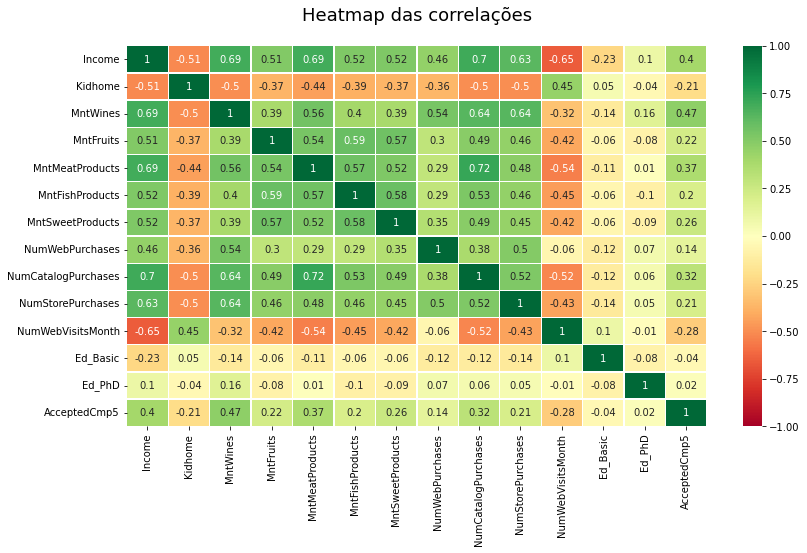

In [ ]:
## Criando quadro para plotar figura da correlação

fig_1, ax_1= plt.subplots(figsize=(13,7))

## Crianndo o título
plt.title("Heatmap das correlações",fontsize=18)
ttl = ax_1.title
ttl.set_position([0.5,1.05])

## Criando a visualização do heatmap com o Seaborn
sns.heatmap(cm_1, vmin=-1.0,vmax=1.0,annot=True,cmap='RdYlGn',linewidths=0.30,ax=ax_1)
plt.show()

In [ ]:
## Ok, analisando a imagem, vou optar pelas seguintes variáveis na regressão:

## 'Income'= Y

##     ('MntWines','MntMeatProducts', 'NumCatalogPurchases', 'NumWebVisitsMonth','NumStorePurchases') == X

# O critério utilizado foi o grau de correlação entre essas variáveis e a renda e entre essas variáveis e as demais.

## Dito isso, as bases para estimar a regressão estão prontas.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
## Criando objeto da classe Linear Regression
lr = LinearRegression()

In [ ]:
## Criando dataframes do nosso Y e dos nossos Xs

df_4 = df_2[~df_2['Income'].isnull()]   ##esse comando foi preciso porque a classe lr não funciona com dados nulos, logo tive que fazer uma copia da DF que vamos utilizar, porém sem os nulos.
X = df_4[['MntWines','MntMeatProducts','NumCatalogPurchases', 'NumWebVisitsMonth', 'NumStorePurchases']]
Y = df_4[['Income']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.3) 
## Vou separar para o teste 30% da amostra e para treino 70%, esse método é chamado de holdout e é bem aceito no meio corporativo. 
## 70% da amostra irá passar pelo FIT e os outros 30% serão utilizados para teste.
## o random state irá fixar ou não um valor para o train, teste e split começar. 

In [ ]:
Y_test

,Income
1036,37334.0
428,10404.0
484,83151.0
757,58512.0
447,81246.0
...,...
1870,26642.0
1931,67472.0
934,75127.0
1509,53977.0


In [ ]:
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
lr.intercept_

array([52971.75329795])

In [ ]:
lr.coef_

array([[   20.97524186,    16.47342991,   727.77692514, -3120.15217015,
          801.07731245]])

Fórmula da nossa regressão de treino:

Income = B0 + B1*MW + B2*MM + B3*NCP + B4*NWB + B5*NSP + B6*ED_B + B7C_5

Income = 
50524.51937051 + 
16.99866589*df_2['MntWines'] + 
18.19720006*df_2['MntMeatProducts'] + 
1324.01587426*df_2['NumCatalogPurchases']+ 
-2784.10206009*df_2['NumWebVisitsMonth'] + 
777.23797293*df_2['NumStorePurchases'] +
-14016.88014366*df_2['Ed_Basic'] +
1609.10715328*df_2['AcceptedCmp5']

In [ ]:
YHat = lr.predict(X_test).round(2)

In [ ]:
YHat

array([[44504.39],
       [40798.46],
       [63549.86],
       [57766.92],
       [76292.41],
       [47023.89],
       [48584.48],
       [27181.55],
       [59259.83],
       [37901.88],
       [35515.45],
       [48404.7 ],
       [53776.15],
       [27485.42],
       [40455.87],
       [39174.6 ],
       [40432.16],
       [71638.37],
       [57957.07],
       [47474.98],
       [71892.61],
       [42311.34],
       [69388.84],
       [38575.84],
       [72221.47],
       [47437.36],
       [37383.6 ],
       [70826.06],
       [60887.74],
       [39272.43],
       [37798.29],
       [66536.51],
       [41462.1 ],
       [71700.08],
       [29939.29],
       [64307.29],
       [57502.9 ],
       [29703.35],
       [55120.47],
       [27796.82],
       [40451.37],
       [60782.15],
       [36024.89],
       [76851.98],
       [63148.78],
       [32941.06],
       [37667.71],
       [48647.92],
       [52989.22],
       [37602.04],
       [47065.84],
       [36368.03],
       [5352

In [ ]:
Y_test

,Income
1036,37334.0
428,10404.0
484,83151.0
757,58512.0
447,81246.0
...,...
1870,26642.0
1931,67472.0
934,75127.0
1509,53977.0


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
r2= r2_score(Y_test, YHat)
print('As variáveis explicativas do meu modelo explicam', (r2*100).round(2), "% das variações na renda dos clientes")

As variáveis explicativas do meu modelo explicam 75.54 % das variações na renda dos clientes


In [ ]:
m_abe=mean_absolute_error(Y_test,YHat)
print('O erro médio absoluto do modelo é:', (m_abe).round(2))

O erro médio absoluto do modelo é: 7956.29


In [ ]:
m_sqe=mean_squared_error(Y_test,YHat)
print('O erro médio quadrático do modelo é:', (m_sqe).round(2))

O erro médio quadrático do modelo é: 109231727.29


In [ ]:
import math
m_sqe_sqrt=math.sqrt(m_sqe)
print('A raiz quadrada do erro médio quadrático é:', (m_sqe_sqrt))

A raiz quadrada do erro médio quadrático é: 10451.398341203643


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


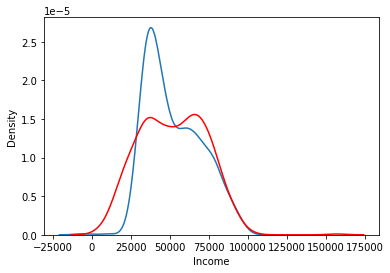

In [ ]:
## Vendo se os valores previstos ficaram bem ajustados
sns.distplot(YHat,hist=False,label='ValorEst')
sns.distplot(Y_test['Income'],hist=False,color='r',label='ValorReal')
plt.show()

In [ ]:
## Resultado não é dos melhores, talvez aplicar um modelo polinomial será mais proveitoso. Mas vamos prosseguir por enquanto.

In [ ]:
import pickle
with open ('RegLinear.pkl','wb') as modelo:
  pickle.dump(lr,modelo)

In [ ]:
with open ('RegLinear.pkl','rb') as modelo:
  regressao=pickle.load(modelo)

In [ ]:
regressao

LinearRegression()

Salários estimados, agora vamos incluí-los em uma nova variável na tabela e substituir os nulos da variável antiga pelos valores da variável nova.

In [ ]:
df_5=df_2[df_2['Income'].isnull()]
X_2=df_5[['MntWines','MntMeatProducts','NumCatalogPurchases', 'NumWebVisitsMonth', 'NumStorePurchases']]

In [ ]:
Yhat_2=regressao.predict(X_2)
df_5[['Income_pred']]=Yhat_2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
df_5

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Ec_Divorced,Ec_Married,Ec_Single,Ec_Together,Ec_Widow,Ed_Basic,Ed_Graduation,Ed_Master,Ed_PhD,Income_pred
10,1994,1983.0,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,0,1,0,0,0,0,1,0,0,32784.457426
27,5255,1986.0,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,0,1,0,0,0,1,0,0,47880.002240
43,7281,1959.0,PhD,Single,NaN,0,0,2013-11-05,80,81,...,0,0,1,0,0,0,0,0,1,54324.066705
48,7244,1951.0,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,0,0,1,0,0,0,1,0,0,39942.276342
58,8557,1982.0,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,0,0,1,0,0,0,1,0,0,36738.944655
71,10629,1973.0,Master,Married,NaN,1,0,2012-09-14,25,25,...,0,1,0,0,0,0,0,1,0,31790.863058
90,8996,1957.0,PhD,Married,NaN,2,1,2012-11-19,4,230,...,0,1,0,0,0,0,0,0,1,41737.091928
91,9235,1957.0,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,0,0,1,0,0,0,1,0,0,32854.849157
92,5798,1973.0,Master,Together,NaN,0,0,2013-11-23,87,445,...,0,0,0,1,0,0,0,1,0,73351.585734
128,8268,1961.0,PhD,Married,NaN,0,1,2013-07-11,23,352,...,0,1,0,0,0,0,0,0,1,47059.443490


In [ ]:
df_2['Income'].fillna(df_5['Income_pred'],inplace=True)

In [ ]:
df_2.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Ec_Divorced            0
Ec_Married             0
Ec_Single              0
Ec_Together            0
Ec_Widow               0
Ed_Basic               0
Ed_Graduation          0
Ed_Master              0
Ed_PhD                 0
dtype: int64

In [ ]:
## Com isso, finalizamos a parte de tratamento dos dados (FINALMENTE!)
## Agora, vamos fazer as análises gráficas e etc p/ ajudar a equipe de marketing na próxima campanha.

### **Analisando os dados**

In [ ]:
## Em primeiro lugar, vamos fazer duas coisas. Relembrar nosso objetivo e visualizar o dataframe "df", já que eu não consegui resolver o problema dos dados de income nulos da segunda forma.

**The Objective**

The objective of the team is to build an analysis to address the highest profit for the next direct marketing campaign, scheduled for the next month. The new campaign, sixth, aims at selling a new gadget to the Customer Database. To build the analysis, a pilot campaign involving 2.240 customers was carried out. The customers were selected at random and contacted by phone regarding the acquisition of the gadget. During the following months, customers who bought the
offer were properly labeled. The total cost of the sample campaign was 6.720MU and the revenue generated by the customers who accepted the offer was 3.674MU. Globally the campaign had a profit of -3.046MU. The success rate of the campaign was 15%.

In [ ]:
## Revendo o datafreme
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2233 non-null   int64  
 1   Year_Birth           2233 non-null   float64
 2   Education            2233 non-null   object 
 3   Marital_Status       2233 non-null   object 
 4   Income               2233 non-null   float64
 5   Kidhome              2233 non-null   int64  
 6   Teenhome             2233 non-null   int64  
 7   Dt_Customer          2233 non-null   object 
 8   Recency              2233 non-null   int64  
 9   MntWines             2233 non-null   int64  
 10  MntFruits            2233 non-null   int64  
 11  MntMeatProducts      2233 non-null   int64  
 12  MntFishProducts      2233 non-null   int64  
 13  MntSweetProducts     2233 non-null   int64  
 14  MntGoldProds         2233 non-null   int64  
 15  NumDealsPurchases    2233 non-null   i

In [ ]:
## Vamos criar uma variável de "idade" e outra de "tempo de cliente" para compor nossa análise
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'], format='%Y-%m-%d')

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957.0,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954.0,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965.0,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984.0,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981.0,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967.0,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946.0,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981.0,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956.0,Master,Together,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


In [ ]:
## Para criar a variável referente à idade, precisamos saber de qual ano é a base de dados.
df['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

In [ ]:
## Parece que a base é de 2014, então a idade dos clientes deve ser o resultado da seguinte fórmula:
df['Age']=2014-df['Year_Birth']

In [ ]:
## Já pra ver a quanto tempo cada ID é um cliente da empresa, a fórmula é:
df['Cust_for']=(df['Dt_Customer'].max()-df['Dt_Customer']).dt.days

In [ ]:
## Agora, vamos criar outras três variáveis. Uma do total gasto nos últimos dois anos, outra do total gasto em produtos regulares (não ouro)
## e outra da quantidade total de compras no período.
df['MntTotal']=(df['MntFishProducts']+df['MntMeatProducts']+df['MntSweetProducts']+df['MntWines']+df['MntFruits'])
df['MntRegProds']=(df['MntTotal']-df['MntGoldProds'])
df['NumPurchases']=(df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases'])

In [ ]:
## Vou mover as novas colunas para outras posições no df.
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Cust_for', 'MntTotal',
       'MntRegProds', 'NumPurchases'],
      dtype='object')

In [ ]:
df=df[['ID', 'Year_Birth','Age','Cust_for', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntTotal', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','MntRegProds','NumPurchases', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response']]

In [ ]:
df.head()

,ID,Year_Birth,Age,Cust_for,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957.0,57.0,663,Graduation,Single,58138.0,0,0,2012-09-04,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954.0,60.0,113,Graduation,Single,46344.0,1,1,2014-03-08,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965.0,49.0,312,Graduation,Together,71613.0,0,0,2013-08-21,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984.0,30.0,139,Graduation,Together,26646.0,1,0,2014-02-10,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981.0,33.0,161,PhD,Married,58293.0,1,0,2014-01-19,...,3,6,5,0,0,0,0,0,0,0


In [ ]:
## Feito esses ajustes, vamos analisar os dados.
## O objetivo é analisar dados de uma campanha prévia para indicar caminhos para uma campanha futura,
## portanto, vou separar os dados em dois dataframes, um com os clientes que compraram o produto e outro com os que não compraram.

df_r1=df[df['Response']==1]
df_r0=df[df['Response']==0]

In [ ]:
df_r1

,ID,Year_Birth,Age,Cust_for,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957.0,57.0,663,Graduation,Single,58138.0,0,0,2012-09-04,...,10,4,7,0,0,0,0,0,0,1
8,4855,1974.0,40.0,388,PhD,Together,30351.0,1,0,2013-06-06,...,0,2,9,0,0,0,0,0,0,1
15,2114,1946.0,68.0,582,PhD,Single,82800.0,0,0,2012-11-24,...,6,12,3,0,0,1,1,0,0,1
33,7373,1952.0,62.0,608,PhD,Divorced,46610.0,0,2,2012-10-29,...,1,6,6,0,0,0,0,0,0,1
39,2968,1943.0,71.0,513,PhD,Divorced,48948.0,0,0,2013-02-01,...,10,5,6,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,8722,1957.0,57.0,600,Master,Married,82347.0,0,0,2012-11-06,...,7,10,3,1,0,0,1,0,0,1
2194,7118,1957.0,57.0,697,Graduation,Married,73803.0,0,1,2012-08-01,...,5,6,6,1,0,0,0,0,0,1
2198,2632,1954.0,60.0,376,Graduation,Married,50501.0,1,1,2013-06-18,...,4,4,6,1,0,0,0,0,0,1
2221,7366,1982.0,32.0,360,Master,Single,75777.0,0,0,2013-07-04,...,6,11,1,0,1,1,0,0,0,1


In [ ]:
df_r0

,ID,Year_Birth,Age,Cust_for,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
1,2174,1954.0,60.0,113,Graduation,Single,46344.0,1,1,2014-03-08,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965.0,49.0,312,Graduation,Together,71613.0,0,0,2013-08-21,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984.0,30.0,139,Graduation,Together,26646.0,1,0,2014-02-10,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981.0,33.0,161,PhD,Married,58293.0,1,0,2014-01-19,...,3,6,5,0,0,0,0,0,0,0
5,7446,1967.0,47.0,293,Master,Together,62513.0,0,1,2013-09-09,...,4,10,6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974.0,40.0,363,Graduation,Married,34421.0,1,0,2013-07-01,...,0,2,7,0,0,0,0,0,0,0
2235,10870,1967.0,47.0,381,Graduation,Married,61223.0,0,1,2013-06-13,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946.0,68.0,19,PhD,Together,64014.0,2,1,2014-06-10,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981.0,33.0,155,Graduation,Divorced,56981.0,0,0,2014-01-25,...,3,13,6,0,1,0,0,0,0,0


####**ATENÇÃO: AINDA ESTOU TRABALHANDO NA PARTE ABAIXO**

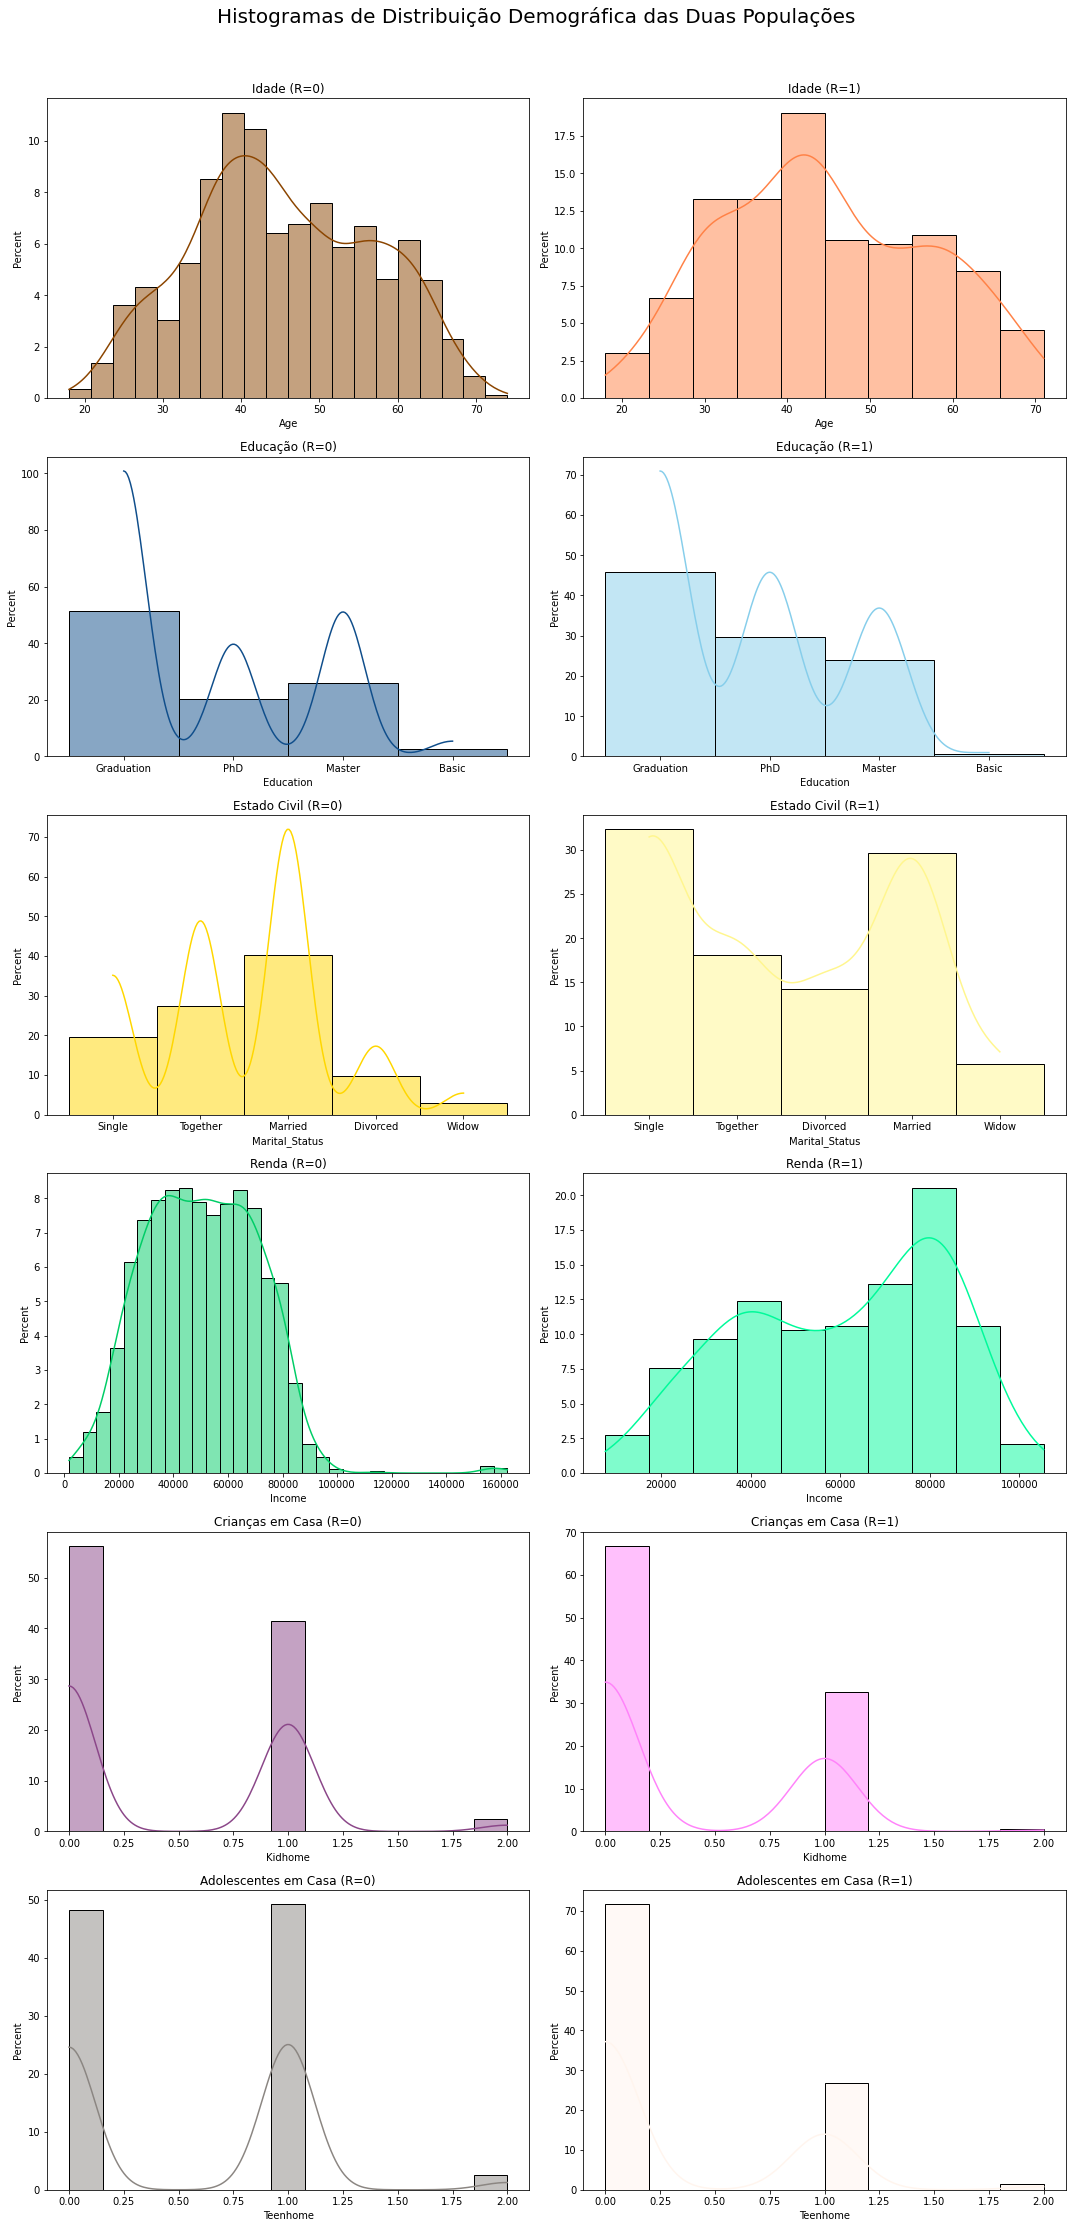

In [ ]:
## Meu primeiro objetivo é analisar demograficamente, ainda que de forma superficial, as duas populações.
## Para isso, vamos plotar alguns gráficos para entender melhor ambos os públicos.

fig, axes= plt.subplots(6,2,figsize=[15,30])

## Idade:
hg_age_r0=sns.histplot(x='Age',data=df_r0,ax=axes[0,0],stat='percent',kde=True,color='#8B4500')
hg_age_r0.set_title('Idade (R=0)', fontsize=12)
hg_age_r1=sns.histplot(x='Age',data=df_r1,ax=axes[0,1],stat='percent',kde=True,color='#FF8247')
hg_age_r1.set_title('Idade (R=1)', fontsize=12)

## Educação:
hg_ed_r0=sns.histplot(x='Education',data=df_r0,ax=axes[1,0],stat='percent',kde=True,color='#104E8B')
hg_ed_r0.set_title('Educação (R=0)', fontsize=12)
hg_ed_r1=sns.histplot(x='Education',data=df_r1,ax=axes[1,1],stat='percent',kde=True,color='Skyblue') ##	#87CEFF
hg_ed_r1.set_title('Educação (R=1)', fontsize=12)

## Estado Civil:
hg_ec_r0=sns.histplot(x='Marital_Status',data=df_r0,ax=axes[2,0],stat='percent',kde=True,color='#FFD700')
hg_ec_r0.set_title('Estado Civil (R=0)', fontsize=12)
hg_ec_r1=sns.histplot(x='Marital_Status',data=df_r1,ax=axes[2,1],stat='percent',kde=True,color='#FFF68F') ##	#87CEFF
hg_ec_r1.set_title('Estado Civil (R=1)', fontsize=12)

## Renda:
hg_inc_r0=sns.histplot(x='Income',data=df_r0,ax=axes[3,0],stat='percent',kde=True,color='#00CD66')
hg_inc_r0.set_title('Renda (R=0)', fontsize=12)
hg_inc_r1=sns.histplot(x='Income',data=df_r1,ax=axes[3,1],stat='percent',kde=True,color='#00FA9A') ##	#87CEFF
hg_inc_r1.set_title('Renda (R=1)', fontsize=12)

## Crianças:
hg_kid_r0=sns.histplot(x='Kidhome',data=df_r0,ax=axes[4,0],stat='percent',kde=True,color='#8B4789')
hg_kid_r0.set_title('Crianças em Casa (R=0)', fontsize=12)
hg_kid_r1=sns.histplot(x='Kidhome',data=df_r1,ax=axes[4,1],stat='percent',kde=True,color='#FF83FA') ##	#87CEFF
hg_kid_r1.set_title('Crianças em Casa (R=1)', fontsize=12)

## Adolescentes:
hg_teen_r0=sns.histplot(x='Teenhome',data=df_r0,ax=axes[5,0],stat='percent',kde=True,color='#8B8682')
hg_teen_r0.set_title('Adolescentes em Casa (R=0)', fontsize=12)
hg_teen_r1=sns.histplot(x='Teenhome',data=df_r1,ax=axes[5,1],stat='percent',kde=True,color='#FFF5EE') ##	#87CEFF
hg_teen_r1.set_title('Adolescentes em Casa (R=1)', fontsize=12)

##

fig.suptitle('Histogramas de Distribuição Demográfica das Duas Populações', fontsize=20,x=0.5,y=1.03)
fig.tight_layout()

plt.show()


**Conclusões inicais da análise demográfica:**

1.   Os clientes que adquiriram o produto têm entre 18 e 71 anos. Porém, mais de 90% deles têm entre 24 e 66 anos e cerca de 75% entre 29 e 61 anos.


2.   Mais de 95% deles possui renda entre 18.000 e 96.000 UM e mais de 85% entre 28 mil e 96 mil UM.

3. A respeito do nível de escolaridade, aproximadamente 100% dos clientes que adquiriram o produto tem nível de pós-graduação, mestrado ou PhD, sendo que mais de 70% são pós-graduados ou possuem PhD.


4. Sobre o estado civil, mais de 90% dos clientes que adquiriram o produto não são viúvos, sendo que aproximamente 60% deles são solteiros ou casados e 30% divorciados ou em união estável.

5. Sobre filhos, cerca de 65% dos clientes que adquiriram o produto não tem crianças em casa e cerca de 34% deles tem apenas uma. Sobre adolescentes, cerca de 70% dos clientes não tem nenhum em casa e 28% tem apenas um.

6. Analisando os gráficos do grupo que não adquiriu o produto, podemos observar que os que adquiriram tem algumas tendências semelhantes, mas outras características bem divergentes, principalmente em relaçao à faixa de renda (1.000-160.000) e a composição do estado civil, como veremos mais especificamente abaixo. 

In [ ]:
## Agora vamos complementar esses gráficos com uma análise percentual mais precisa

In [ ]:
df_r1['Education'].value_counts(normalize=True).round(4)*100

Graduation    45.92
PhD           29.61
Master        23.87
Basic          0.60
Name: Education, dtype: float64

In [ ]:
df_r1['Marital_Status'].value_counts(normalize=True).round(4)*100

Single      32.33
Married     29.61
Together    18.13
Divorced    14.20
Widow        5.74
Name: Marital_Status, dtype: float64

In [ ]:
## No caso dos clientes que adquiriram o produto, em termos de variáveis categóricas, podemos observar que:
## Mais de 99% dos clientes ou tem graduação (45,92%), ou PhD (29,6%) ou mestrado (23,87%) completo.
## Além disso, mais de 75% deles são solteiros (32,33%), casados (29,61%) ou estão em situação de união estável (18,13%). Mas um percentual não desprezível (14.20%) está divorciado.

In [ ]:
## Comparando essa análise com a mesma para os clientes que não adquiriram o produto, temos:
df_r0['Education'].value_counts(normalize=True).round(4)*100

Graduation    51.21
Master        25.92
PhD           20.14
Basic          2.73
Name: Education, dtype: float64

In [ ]:
df_r0['Marital_Status'].value_counts(normalize=True).round(4)*100

Married     40.27
Together    27.34
Single      19.66
Divorced     9.67
Widow        3.05
Name: Marital_Status, dtype: float64

In [ ]:
## As conclusões são um pouco parecidas inicialmente, mas podemos observar algumas diferenças.

## O grupo de graduados, mestres e PhDs representa 97% dos clientes, percentual superior aos 90% do outro grupo, mas com uma diferença na composição relevante: 
## A parcela de clientes PhDs é de 20,1% (ou aprox. -9%) e a de graduados é de (51,2% ou aprox +6%).

## Em termos de estado civil, este grupo contém um percentual muito maior de casados (40,27% ou ~+11%) e de pessoas em união estável (27,34% ou ~+9%) do que o anterior.
## Por outro lado, o percentual de solteiros dessa amostra foi bem menor (19,66% ou -~13%). 
## Juntos, esses 3 primeiros grupos representam mais de 85% da amostra, 10% a mais do que o caso anterior.


In [ ]:
## Agora que entendemos sobre a composição demográfica, vamos aprofundar algumas análises.
## Será que os clientes com diferente escolaridade tiveram uma taxa de adesão muito diferente ao produto da 6ª campanha?

pd.crosstab(df['Response'],df['Education'])

Education,Basic,Graduation,Master,PhD
Response,,,,
0,52,974,493,383
1,2,152,79,98


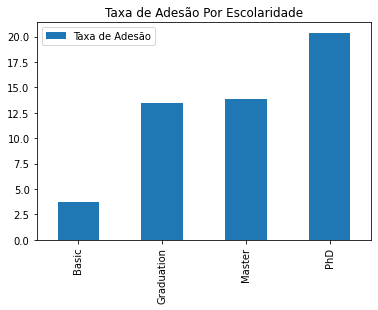

In [ ]:
## Vamos gerar uma visualização da taxa de adesão de cada grau de escolaridade.

## Criando as taxas de cada grau com base nos dados do crosstab
Ad_Ed_B=((2/(2+52))*100)
Ad_Ed_G=((152/(152+974))*100)
Ad_Ed_M=((79/(79+493))*100)
Ad_Ed_P=((98/(98+383))*100)

## Criando o D.F.
Ad_Educ=pd.DataFrame({"Taxa de Adesão": [Ad_Ed_B, Ad_Ed_G, Ad_Ed_M, Ad_Ed_P]}, 
index=["Basic", "Graduation", "Master", "PhD"])

## Criando a visualização
plot1=Ad_Educ.plot(kind="bar")
plot1.set_title('Taxa de Adesão Por Escolaridade', fontsize=12,)

plt.show()

In [ ]:
## E quando analisamos a mesma coisa pelo estado civil?

pd.crosstab(df['Response'],df['Marital_Status'])

Marital_Status,Divorced,Married,Single,Together,Widow
Response,,,,,
0,184,766,374,520,58
1,47,98,107,60,19


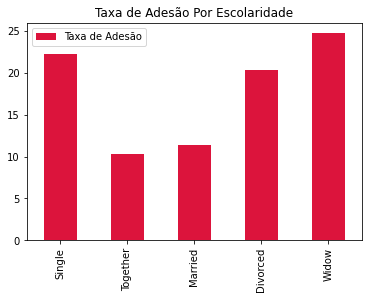

In [ ]:
## Vamos gerar uma visualização da taxa de adesão de cada estado civil.

## Criando as taxas de cada grau com base nos dados do crosstab
Ad_M_S=((107/(107+374))*100)
Ad_M_T=((60/(60+520))*100)
Ad_M_M=((98/(98+766))*100)
Ad_M_D=((47/(47+184))*100)
Ad_M_W=((19/(19+58))*100)

## Criando o D.F.
Ad_MS=pd.DataFrame({"Taxa de Adesão": [Ad_M_S, Ad_M_T, Ad_M_M, Ad_M_D, Ad_M_W]}, 
index=["Single", "Together", "Married", "Divorced", 'Widow'])

## Criando a visualização
plot1=Ad_MS.plot(kind="bar",color='#DC143C')
plot1.set_title('Taxa de Adesão Por Escolaridade', fontsize=12,)

plt.show()

In [ ]:
## A taxa de adesão muda bastante conforme as categorias de escolaridade e estado civil.
## Vamos ver se a correlação é capaz de capturar isso também. 

In [ ]:
df_3[['Education','Response']].corr().round(2)

,Education,Response
Education,1.00,0.08
Response,0.08,1.00


In [ ]:
df_2[['Ec_Single',	'Ec_Together',	"Ec_Married",	'Ec_Divorced','Ec_Widow','Response']].corr().round(2)

,Ec_Single,Ec_Together,Ec_Married,Ec_Divorced,Ec_Widow,Response
Ec_Single,1.00,-0.31,-0.42,-0.18,-0.10,0.11
Ec_Together,-0.31,1.00,-0.47,-0.20,-0.11,-0.07
Ec_Married,-0.42,-0.47,1.00,-0.27,-0.15,-0.08
Ec_Divorced,-0.18,-0.20,-0.27,1.00,-0.06,0.05
Ec_Widow,-0.10,-0.11,-0.15,-0.06,1.00,0.05
Response,0.11,-0.07,-0.08,0.05,0.05,1.00


In [ ]:
## Em ambos os casos, a correlação foi baixa para todas as variáveis.

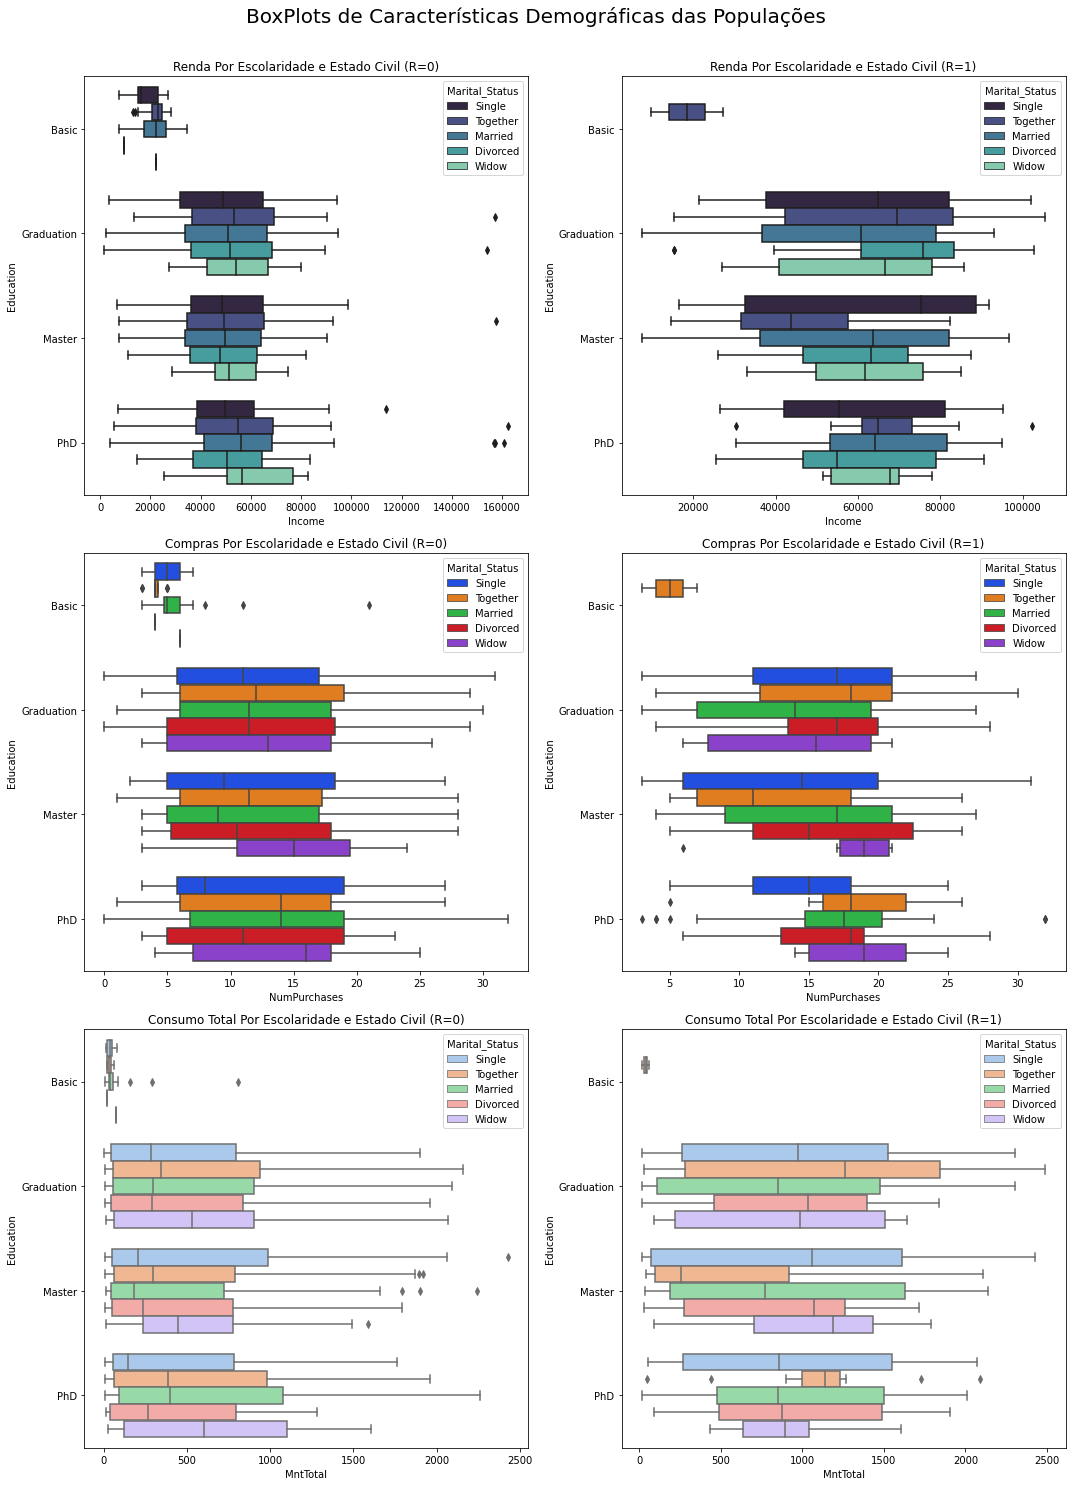

In [ ]:
## Agora, vamos aprofundar mais um pouco na análise incluindo também hábitos de consumo.
## Para isso, vamos plotar alguns gráficos.

janela, graficos= plt.subplots(3,2,figsize=[15,20])

## Educação, Renda e Estado Civil:
sns.boxplot(x='Income',y='Education',hue='Marital_Status',data=df_r0,order=['Basic', 'Graduation', 'Master', 'PhD'],hue_order=['Single','Together','Married','Divorced','Widow'],ax=graficos[0,0],palette='mako').set_title('Renda Por Escolaridade e Estado Civil (R=0)', fontsize=12)
sns.boxplot(x='Income',y='Education',hue='Marital_Status',data=df_r1,order=['Basic', 'Graduation', 'Master', 'PhD'],hue_order=['Single','Together','Married','Divorced','Widow'],ax=graficos[0,1],palette='mako').set_title('Renda Por Escolaridade e Estado Civil (R=1)', fontsize=12)

## Total de compras:
sns.boxplot(x='NumPurchases',y='Education',hue='Marital_Status',data=df_r0,order=['Basic', 'Graduation', 'Master', 'PhD'],hue_order=['Single','Together','Married','Divorced','Widow'],ax=graficos[1,0],palette='bright').set_title('Compras Por Escolaridade e Estado Civil (R=0)', fontsize=12)
sns.boxplot(x='NumPurchases',y='Education',hue='Marital_Status',data=df_r1,order=['Basic', 'Graduation', 'Master', 'PhD'],hue_order=['Single','Together','Married','Divorced','Widow'],ax=graficos[1,1],palette='bright').set_title('Compras Por Escolaridade e Estado Civil (R=1)', fontsize=12)

## Consumo Total
sns.boxplot(x='MntTotal',y='Education',hue='Marital_Status',data=df_r0,order=['Basic', 'Graduation', 'Master', 'PhD'],hue_order=['Single','Together','Married','Divorced','Widow'],ax=graficos[2,0],palette='pastel').set_title('Consumo Total Por Escolaridade e Estado Civil (R=0)', fontsize=12)
sns.boxplot(x='MntTotal',y='Education',hue='Marital_Status',data=df_r1,order=['Basic', 'Graduation', 'Master', 'PhD'],hue_order=['Single','Together','Married','Divorced','Widow'],ax=graficos[2,1],palette='pastel').set_title('Consumo Total Por Escolaridade e Estado Civil (R=1)', fontsize=12)

## Configurações finais do plot
janela.suptitle('BoxPlots de Características Demográficas', fontsize=20,x=0.5,y=1.03)
janela.tight_layout()

plt.show()

##### **IDEIA AINDA EM FORMULAÇÃO**: INSERIR PARTE ALTERNATIVA COM AUTOMAÇÃO DO PANDAS PROFILING

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
Pr= ProfileReport(df_r1)
Pr.to_file(output_file='PandasProfiling_v1.html')

In [ ]:
Pr